In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
ratings_df = pd.read_csv('./rsprac/ratings.csv')
tags_df = pd.read_csv('./rsprac/tags.csv')
movies_df = pd.read_csv('./rsprac/movies.csv')

In [4]:
ratings_df.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [5]:
tags_df.head()

,userId,movieId,tag,timestamp
0,2,60756,funny,1445714994
1,2,60756,Highly quotable,1445714996
2,2,60756,will ferrell,1445714992
3,2,89774,Boxing story,1445715207
4,2,89774,MMA,1445715200


In [6]:
movies_df.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [7]:
movies_df = movies_df.replace([np.inf, -np.inf], np.nan)
movies_df.isna().sum() #nan 없음.

movieId    0
title      0
genres     0
dtype: int64

In [8]:
# 기본이 되는 병합: Rating 기준.

merge_df = pd.merge(movies_df, ratings_df)
merge_df

,movieId,title,genres,userId,rating,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,4.0,964982703
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,4.0,847434962
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,7,4.5,1106635946
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,15,2.5,1510577970
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,17,4.5,1305696483
...,...,...,...,...,...,...
100831,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy,184,4.0,1537109082
100832,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy,184,3.5,1537109545
100833,193585,Flint (2017),Drama,184,3.5,1537109805
100834,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation,184,3.5,1537110021


In [9]:
#https://moojuksublime.tistory.com/13 참고.
year = merge_df["title"].apply(lambda x : x.strip()[-5:-1] if (x[-6] == '(' and x[-1] == ')') else '0000')

# 10년주기로 묶고, era라는 칼럼으로 생성한다.
merge_df['era'] = year.apply(lambda x : x[:3] + '0')
set(merge_df['era'])

{'0000',
 '1900',
 '1910',
 '1920',
 '1930',
 '1940',
 '1950',
 '1960',
 '1970',
 '1980',
 '1990',
 '2000',
 '2010'}

In [10]:
merge_df.groupby(['era']).count()['rating']

era
0000       31
1900        8
1910        8
1920      125
1930      687
1940     1101
1950     1784
1960     2858
1970     4994
1980    12912
1990    37084
2000    29762
2010     9482
Name: rating, dtype: int64

C:\Users\PC\AppData\Local\Temp\ipykernel_21776\2365327029.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  plt.plot(merge_df.groupby(['era']).mean()['rating'])


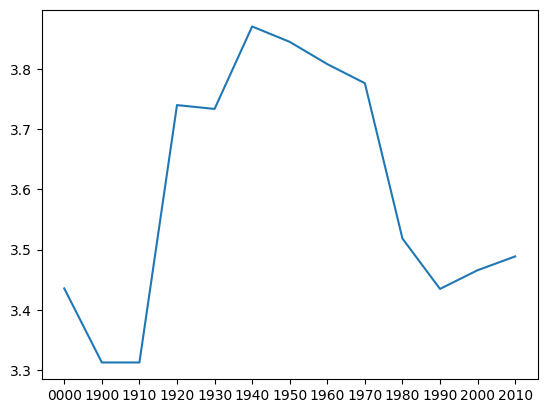

In [11]:
plt.plot(merge_df.groupby(['era']).mean()['rating'])

- 평균 평점은 1950년~1960년대 영화일수록 높아지고, 양 끝으로 갈수록 낮아지는 경향이 있다.
- 1950~1960년대 영화는 1980년대 이후 영화에 비해 수가 적다는 점을 함께 보자.
- 세울 수 있는 가설 중 하나는 오래 전 영화일수록 관람되고 평점을 매길 만하기 위해선 그만큼 명작이거나 고전으로 인정받아야 한다는 것이다.
- 즉 오래 전 영화라서 평점이 높았다기보단, 평점이 높을 만한 영화였기에 데이터로 남을 만했다는 가설이다.
- 1900~1930년대 영화는 사례수가 예외적으로 부족할뿐더러, 영화의 태동기로 실험적 영화가 많았기 때문에 평점이 낮을 수 있다.

- 연도가 기록되지 않거나, 1920년대까지 발매된 영화는 무시할 수 있을 만큼 사례수가 적다.

In [12]:
#genres를 list로 변환한 후, genres의 set을 도출한다.

genres_df = merge_df["genres"].apply(lambda x : x.split('|'))
merge_df['genreCount'] = genres_df.apply(lambda x : len(x))
merge_df.head()

,movieId,title,genres,userId,rating,timestamp,era,genreCount
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,4.0,964982703,1990,5
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,4.0,847434962,1990,5
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,7,4.5,1106635946,1990,5
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,15,2.5,1510577970,1990,5
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,17,4.5,1305696483,1990,5


In [13]:
merge_df.groupby(['genreCount']).count()['rating']

genreCount
1     16414
2     28562
3     31889
4     16701
5      5519
6      1388
7       360
8         1
10        2
Name: rating, dtype: int64

- genreCount가 8, 10인 데이터는 버리고 plot을 만들겠다.

C:\Users\PC\AppData\Local\Temp\ipykernel_21776\1838381061.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  plt.plot(merge_df.groupby(['genreCount']).mean()['rating'][:7])
C:\Users\PC\AppData\Local\Temp\ipykernel_21776\1838381061.py:1: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  plt.plot(merge_df.groupby(['genreCount']).mean()['rating'][:7])


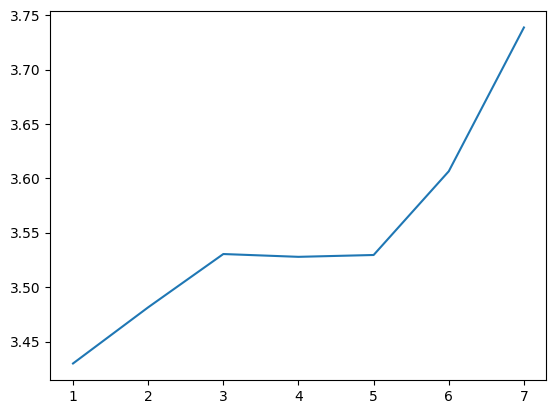

In [14]:
plt.plot(merge_df.groupby(['genreCount']).mean()['rating'][:7])

- 부여된 genre의 수가 많을수록 명확히 상승하는 추세가 발견된다.
- genre가 너무 많아 영화가 난잡해지거나 메세지가 희석되는 효과보다,
- 다양한 기호를 가진 시청자를 만족시키는 효과가 더 높다는 주장을 뒷받침하는 결과이다.

In [15]:
genres_set = list({genre for genres in genres_df for genre in genres})
genres_set

['Comedy',
 'Action',
 'Crime',
 'IMAX',
 'Drama',
 'Animation',
 'Documentary',
 'Thriller',
 'Western',
 '(no genres listed)',
 'War',
 'Adventure',
 'Fantasy',
 'Romance',
 'Film-Noir',
 'Mystery',
 'Horror',
 'Musical',
 'Sci-Fi',
 'Children']

In [16]:
#genres를 binary column으로 변환하기 위한 작업.

for genre in genres_set:
  merge_df[genre] = merge_df['genres'].str.contains(genre).apply(int)

merge_df.head()

C:\Users\PC\AppData\Local\Temp\ipykernel_21776\1483049991.py:4: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  merge_df[genre] = merge_df['genres'].str.contains(genre).apply(int)


,movieId,title,genres,userId,rating,timestamp,era,genreCount,Comedy,Action,...,War,Adventure,Fantasy,Romance,Film-Noir,Mystery,Horror,Musical,Sci-Fi,Children
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,4.0,964982703,1990,5,1,0,...,0,1,1,0,0,0,0,0,0,1
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,4.0,847434962,1990,5,1,0,...,0,1,1,0,0,0,0,0,0,1
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,7,4.5,1106635946,1990,5,1,0,...,0,1,1,0,0,0,0,0,0,1
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,15,2.5,1510577970,1990,5,1,0,...,0,1,1,0,0,0,0,0,0,1
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,17,4.5,1305696483,1990,5,1,0,...,0,1,1,0,0,0,0,0,0,1


<AxesSubplot: >

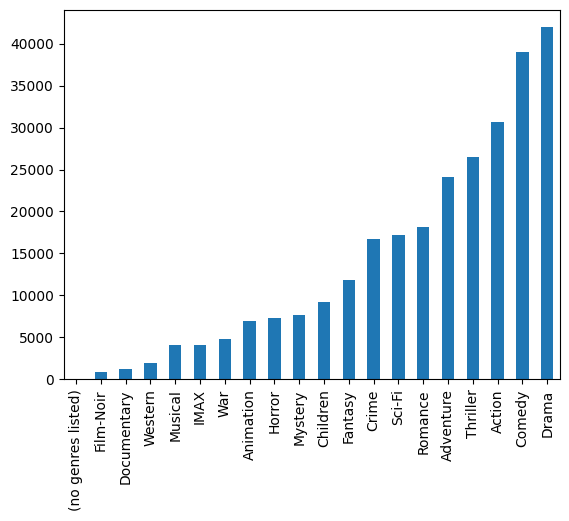

In [35]:
# 장르별 보편성을 알아보기 위해 '건수'를 분석하겠다.

genre_sum = (merge_df.drop(['movieId', 'title', 'genres', 'userId', 'rating', 'timestamp', 'era', 'genreCount'], axis = 1)).sum()
genre_sum = genre_sum.sort_values()
genre_sum.plot.bar()

- Rating 건수에 따라 정렬했을 때 Drama, Comedy, Action 등의 건수가 가장 많았으며,
- Film-Noir, Documentary, War 등은 건수가 가장 적은 축에 속했다.
- 그러나 장르별 평점을 분석하면 다른 양상이 나타난다.

In [17]:
#각 장르별로, 구분이 있을 때와 없을 때를 비교하겠다.

len(genres_set)

20

C:\Users\PC\AppData\Local\Temp\ipykernel_21776\3414554271.py:7: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  axes[(i//5), (i%5)].bar([0, 1], merge_df.groupby(genres_set[i]).mean()['rating'])
C:\Users\PC\AppData\Local\Temp\ipykernel_21776\3414554271.py:7: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  axes[(i//5), (i%5)].bar([0, 1], merge_df.groupby(genres_set[i]).mean()['rating'])
C:\Users\PC\AppData\Local\Temp\ipykernel_21776\3414554271.py:7: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numer

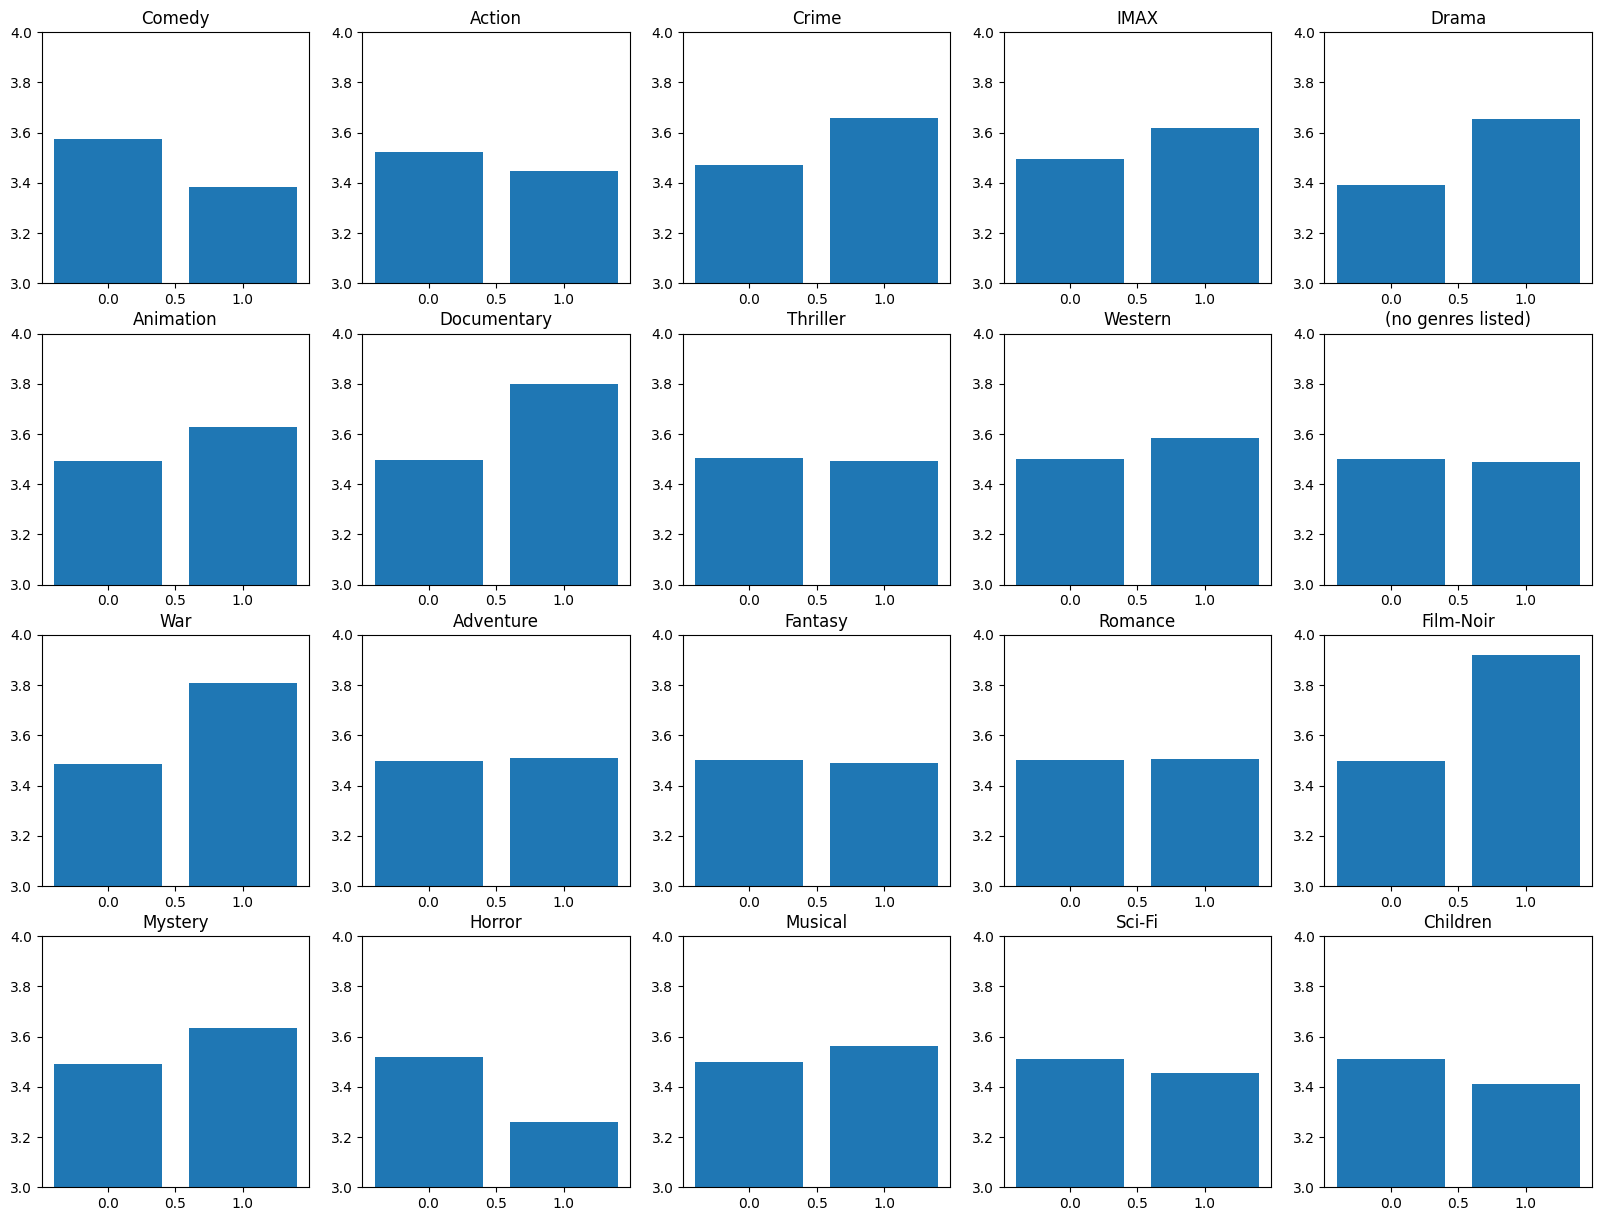

In [23]:
f, axes = plt.subplots(4, 5)
f.set_size_inches((20, 15))

for i in range(len(genres_set)):
  axes[(i//5), (i%5)].set_ylim([3.0, 4.0])
  axes[(i//5), (i%5)].set_title(genres_set[i])
  axes[(i//5), (i%5)].bar([0, 1], merge_df.groupby(genres_set[i]).mean()['rating'])

- Comedy, Action, Horror, Sci-Fi, Children 장르가 부여된 영화는 그렇지 않은 영화보다 평균 평점이 유의하게 더 낮았다.
- Crime, IMAX, Drama, Animation, Documentary, Western, War, Film-Noir, Mystery, Musical 장르가 부여된 영화는 그렇지 않은 영화보다 평균 평점이 유의하게 더 높았다.
- Thriller, Adventure, Fantasy, Romance 장르가 부여된 영화는 그렇지 않은 영화와 평균 평점이 비슷했다.

<AxesSubplot: xlabel='hour'>

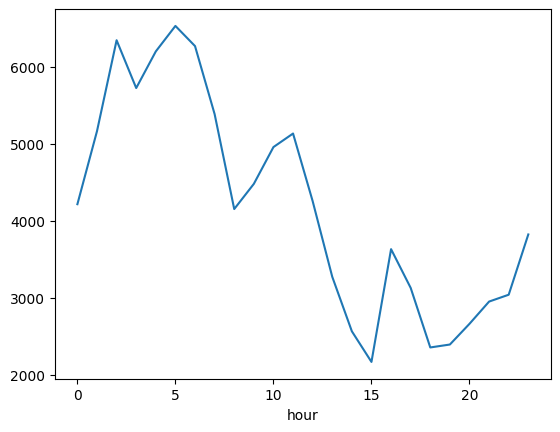

In [50]:
# 평점을 매긴 시간대에 따라서도 평균 평점이 달라지는가?
# 우선 시간대별 건수를 먼저 보자.

import datetime

timestamp = merge_df['timestamp'].apply(datetime.datetime.fromtimestamp)
timestamp = timestamp.apply(lambda x : x.hour)
merge_df['hour'] = timestamp
merge_df.groupby(['hour']).count()['rating'].plot()


C:\Users\PC\AppData\Local\Temp\ipykernel_21776\253234681.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  merge_df.groupby(['hour']).mean()['rating'].plot()


<AxesSubplot: xlabel='hour'>

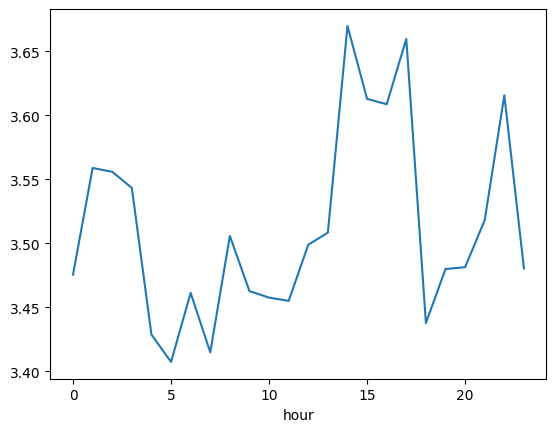

In [51]:
#평균평점을 보겠다.

merge_df.groupby(['hour']).mean()['rating'].plot()

- 평점이 업로드된 시간대에 따라 명확한 경향이 발생하는 것을 확인했다. 
- GMT 기준 0~6시에 업로드된 평점의 건수가 가장 많지만,
- 평균 평점은 5~6시에 가장 낮아져 오히려 15시에 가장 높아지는 경향을 확인하였다.
- 그러나 이것이 낮과 밤에 정확히 대응하는지 알기 위해선 사용자의 국가를 정확히 알아야 하기 때문에 이상의 분석은 어렵다.
- 만약 평점을 업로드한 시간을 유저의 위치정보와 함께 활용한다면, 인간의 생체 리듬에 따라 평점이 어떻게 바뀌는지에 관한 더 자세한 분석이 가능할 것이다. 

In [71]:
from surprise import Dataset, Reader
from surprise import accuracy

In [53]:
merge_df.head()

,movieId,title,genres,userId,rating,timestamp,era,genreCount,Comedy,Action,...,Adventure,Fantasy,Romance,Film-Noir,Mystery,Horror,Musical,Sci-Fi,Children,hour
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,4.0,964982703,1990,5,1,0,...,1,1,0,0,0,0,0,0,1,3
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,4.0,847434962,1990,5,1,0,...,1,1,0,0,0,0,0,0,1,15
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,7,4.5,1106635946,1990,5,1,0,...,1,1,0,0,0,0,0,0,1,15
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,15,2.5,1510577970,1990,5,1,0,...,1,1,0,0,0,0,0,0,1,21
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,17,4.5,1305696483,1990,5,1,0,...,1,1,0,0,0,0,0,0,1,14


In [57]:
#데이터를 'user_id', 'item_id', 'rating' 으로 재정렬한다.

df = merge_df[['userId', 'movieId', 'rating']]
df = df.rename(columns={'userId':'user_id', 'movieId':'item_id'})
df.describe()

,user_id,item_id,rating
count,100836.000000,100836.000000,100836.000000
mean,326.127564,19435.295718,3.501557
std,182.618491,35530.987199,1.042529
min,1.000000,1.000000,0.500000
25%,177.000000,1199.000000,3.000000
50%,325.000000,2991.000000,3.500000
75%,477.000000,8122.000000,4.000000
max,610.000000,193609.000000,5.000000


In [58]:
reader = Reader(rating_scale = (0.5, 5))
data = Dataset.load_from_df(df = df, reader = reader)

In [68]:
from surprise.model_selection import train_test_split
train_data, test_data = train_test_split(data, test_size=0.25, random_state=0)

In [74]:
# https://data-science-hi.tistory.com/80 코드 참고.
# Memory-based CF 모델

from surprise import KNNWithMeans, KNNWithZScore, KNNBasic, KNNBaseline
for algorithm in [KNNBasic(), KNNWithMeans(), KNNWithZScore(), KNNBaseline()]:    
    #Cross-validate 수행.
    algorithm.fit(train_data)
    predictions = algorithm.test(test_data)
    accuracy.rmse(predictions)


Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 0.9457
Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 0.8942
Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 0.8935
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 0.8719


- KNNBaseLine 모델과 KNNWithZScore 모델의 RMSE 값이 가장 낮았다.

In [75]:
# Model-based CF 모델

from surprise import SVD, SVDpp, NMF
for algorithm in [SVD(), SVDpp(), NMF()]:    
    #Cross-validate 수행.
    algorithm.fit(train_data)
    predictions2 = algorithm.test(test_data)
    accuracy.rmse(predictions2)

RMSE: 0.8712
RMSE: 0.8585
RMSE: 0.9229


- SVDpp 모델과 SVD 모델의 RSME 값이 가장 낮았다.

In [112]:
# 추천 함수를 만들겠다.

def recommend(userid, model):
    model.fit(train_data)
    pred = model.test(test_data)
    pred = list(filter(lambda x : x.uid == userid, pred))
    pred = sorted(pred, key = lambda x : x.est, reverse=True)[:10]

    pred = list(map(
        lambda x : 
        (movies_df['title'][movies_df.index[movies_df['movieId'] == x.iid]], x.est), 
        pred))
    
    return pred

In [116]:
#152번 유저에 대한 KNNBaseLine의 추천 결과

print(recommend(152, KNNBaseline()))

Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
[(461    Schindler's List (1993)
Name: title, dtype: object, 4.347638351031437), (4909    Eternal Sunshine of the Spotless Mind (2004)
Name: title, dtype: object, 4.341902825348531), (1734    American History X (1998)
Name: title, dtype: object, 4.323549463691681), (863    Monty Python and the Holy Grail (1975)
Name: title, dtype: object, 4.30965976103704), (7989    Hunt, The (Jagten) (2012)
Name: title, dtype: object, 4.262582383252604), (474    Blade Runner (1982)
Name: title, dtype: object, 4.227585529089629), (7180    Fantastic Mr. Fox (2009)
Name: title, dtype: object, 4.131448029733406), (7372    Inception (2010)
Name: title, dtype: object, 4.0991459009431885), (8550    Ex Machina (2015)
Name: title, dtype: object, 4.073204808654436), (7688    Moneyball (2011)
Name: title, dtype: object, 3.9046204685306987)]


In [117]:
#152번 유저에 대한 KNNWithZScore의 추천 결과


print(recommend(152, KNNWithZScore()))

Computing the msd similarity matrix...
Done computing similarity matrix.
[(4909    Eternal Sunshine of the Spotless Mind (2004)
Name: title, dtype: object, 4.431609652609857), (7180    Fantastic Mr. Fox (2009)
Name: title, dtype: object, 4.429015397157246), (863    Monty Python and the Holy Grail (1975)
Name: title, dtype: object, 4.418355000828606), (7989    Hunt, The (Jagten) (2012)
Name: title, dtype: object, 4.4056522456943625), (1734    American History X (1998)
Name: title, dtype: object, 4.400405056857275), (461    Schindler's List (1993)
Name: title, dtype: object, 4.386805532680349), (474    Blade Runner (1982)
Name: title, dtype: object, 4.3498451145743715), (8550    Ex Machina (2015)
Name: title, dtype: object, 4.234760512022467), (7372    Inception (2010)
Name: title, dtype: object, 4.229207259636121), (7688    Moneyball (2011)
Name: title, dtype: object, 4.103739170925161)]


In [118]:
#SVD의 추천 결과
print(recommend(152, SVD()))

[(4909    Eternal Sunshine of the Spotless Mind (2004)
Name: title, dtype: object, 4.3083563199467205), (461    Schindler's List (1993)
Name: title, dtype: object, 4.269970217656702), (863    Monty Python and the Holy Grail (1975)
Name: title, dtype: object, 4.132974205364281), (1734    American History X (1998)
Name: title, dtype: object, 4.131887087892698), (474    Blade Runner (1982)
Name: title, dtype: object, 4.130633319053177), (7180    Fantastic Mr. Fox (2009)
Name: title, dtype: object, 4.01013416739613), (7372    Inception (2010)
Name: title, dtype: object, 3.936041842619026), (7989    Hunt, The (Jagten) (2012)
Name: title, dtype: object, 3.8850047508748955), (8550    Ex Machina (2015)
Name: title, dtype: object, 3.839523564749298), (7688    Moneyball (2011)
Name: title, dtype: object, 3.7912711772714593)]


In [119]:
#SVDpp의 추천 결과
print(recommend(152, SVDpp()))

[(474    Blade Runner (1982)
Name: title, dtype: object, 4.397585522756143), (4909    Eternal Sunshine of the Spotless Mind (2004)
Name: title, dtype: object, 4.212520763023675), (1734    American History X (1998)
Name: title, dtype: object, 4.080097715807373), (7989    Hunt, The (Jagten) (2012)
Name: title, dtype: object, 4.078314321640443), (461    Schindler's List (1993)
Name: title, dtype: object, 4.065521425760932), (863    Monty Python and the Holy Grail (1975)
Name: title, dtype: object, 3.9631835369363833), (8550    Ex Machina (2015)
Name: title, dtype: object, 3.9344961837756642), (7180    Fantastic Mr. Fox (2009)
Name: title, dtype: object, 3.9338428674327637), (7372    Inception (2010)
Name: title, dtype: object, 3.9328122999992106), (6836    Burn After Reading (2008)
Name: title, dtype: object, 3.7603625192412333)]
